# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd

root_dir = 'C:/Users/baind/OneDrive/UoL/ML' # this is to be defined by you 
local_path = '/datasets/COMP5611M_Assessment/' # store the related data files in this folder

data_dir = root_dir + local_path
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [2]:
train_data = pd.read_csv(training_data_path)
train_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [3]:
train_targets = pd.read_csv(training_targets_path)
train_targets.head()

,TARGET_deathRate
0,199.5
1,137.1
2,126.9
3,173.8
4,179.8


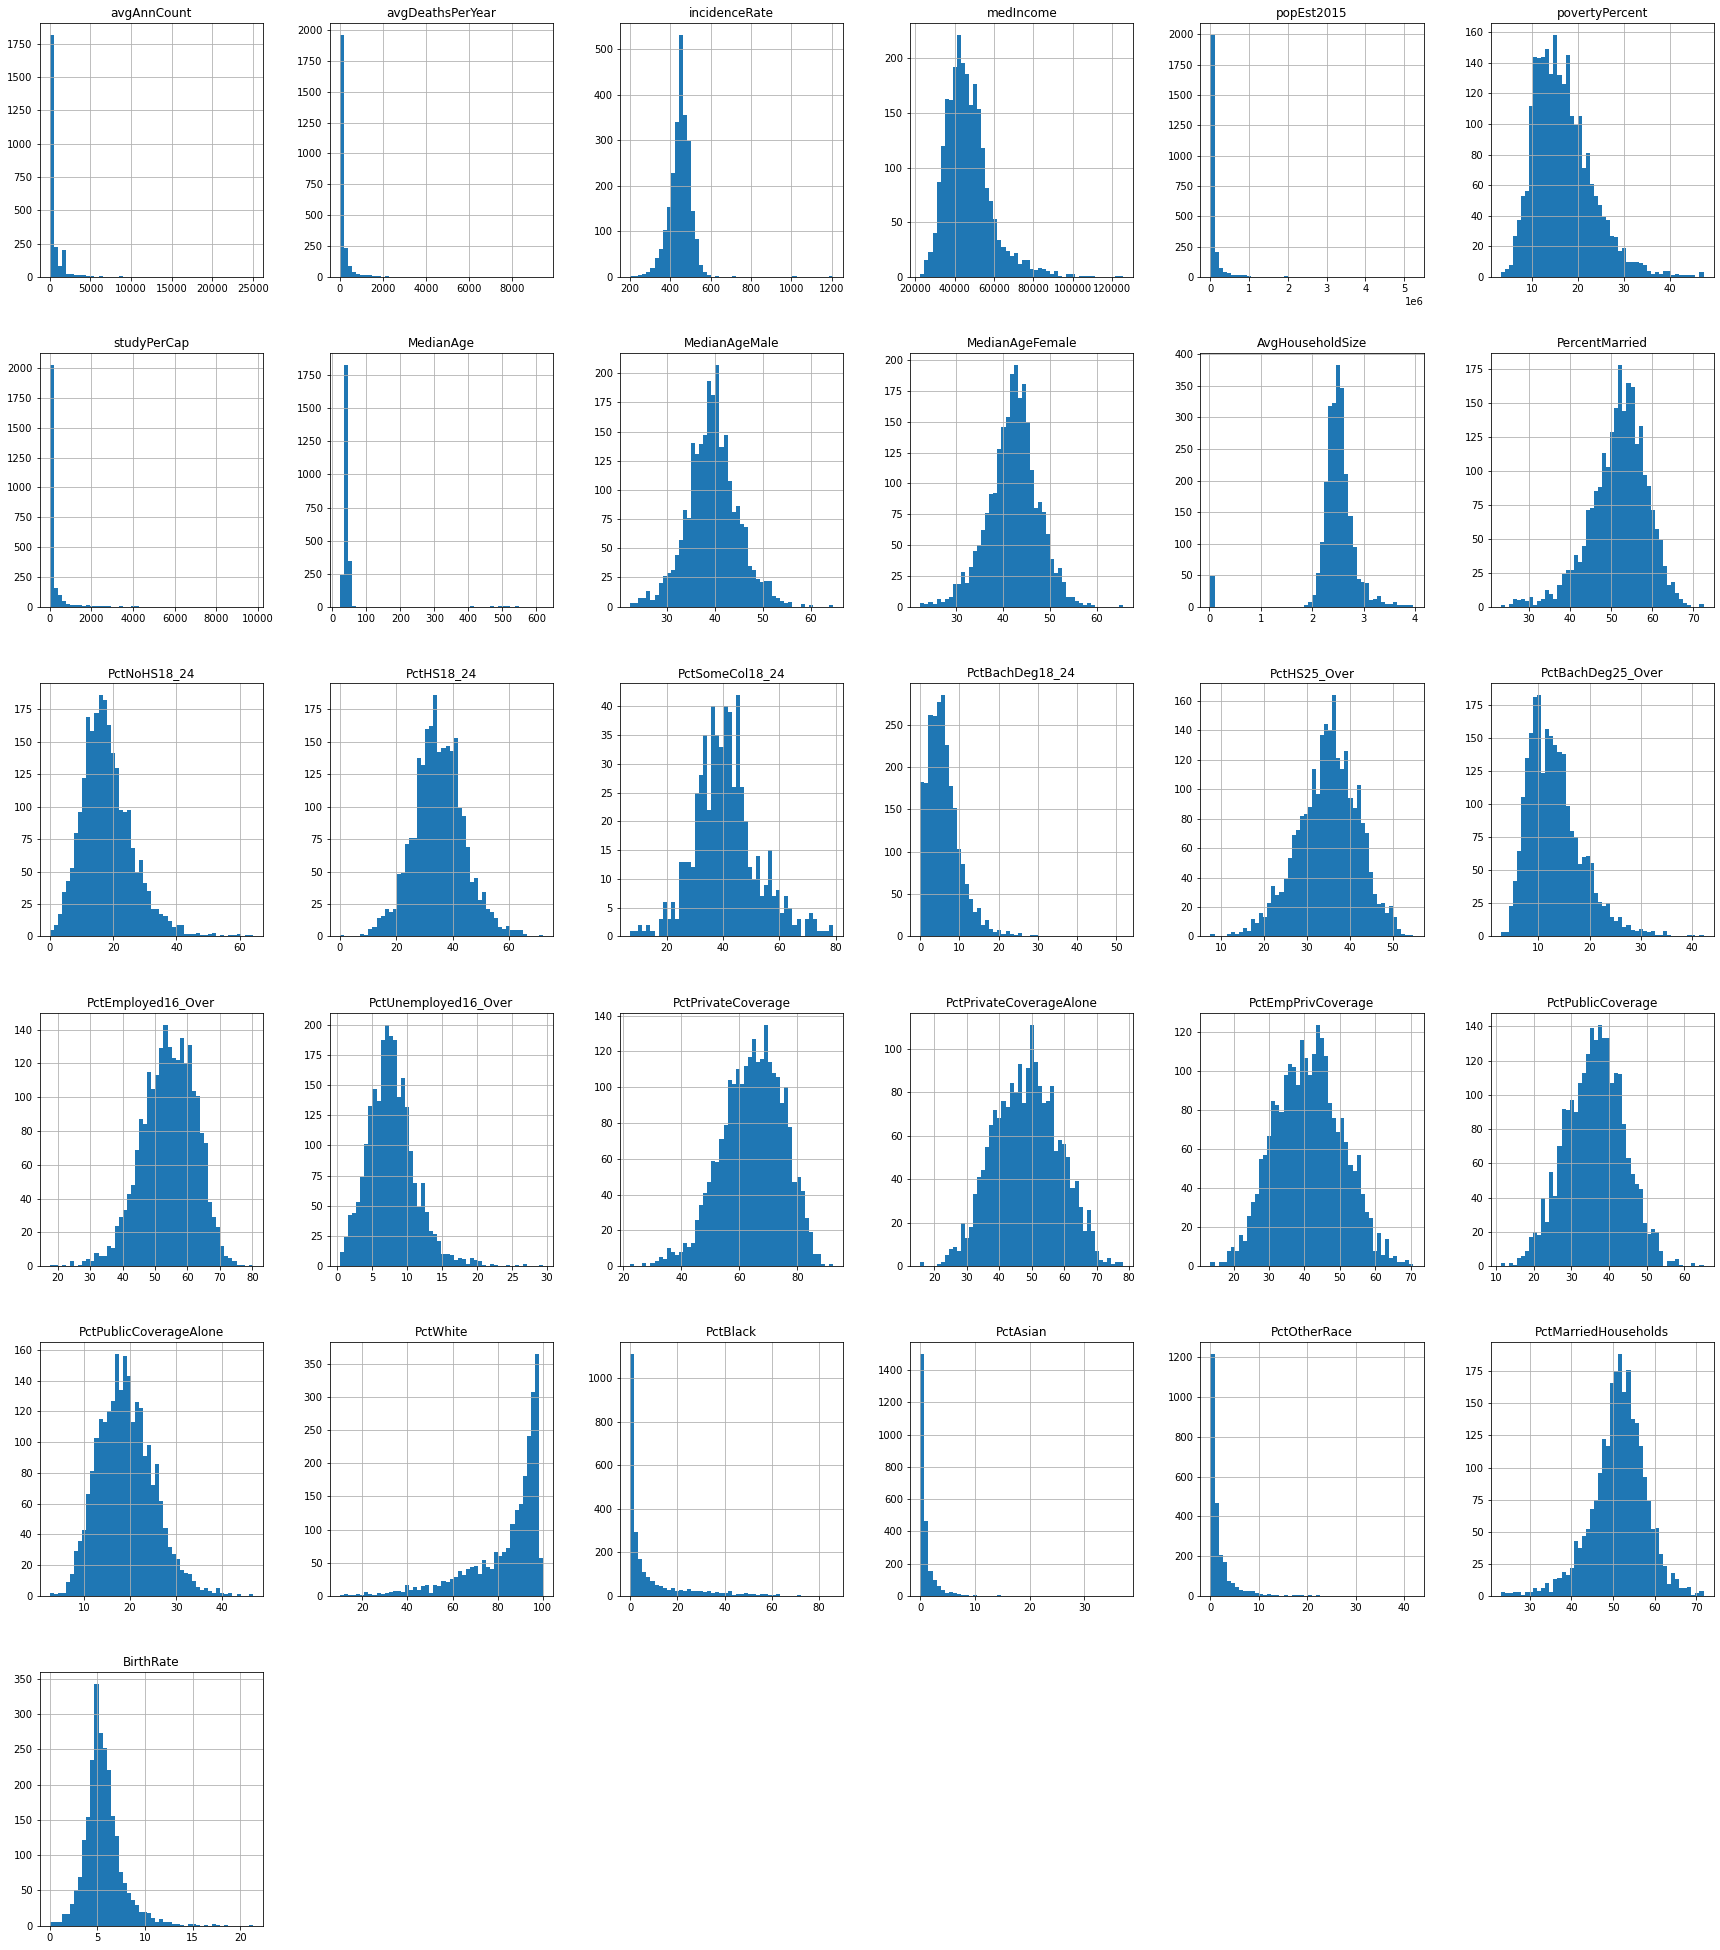

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

train_data.hist(bins=50,figsize=(30,35))
plt.show()

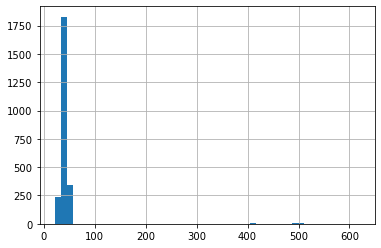

In [5]:
train_data['MedianAge'].hist(bins=50)
plt.show()

The values of MedianAge seem to cross 100 and go upto 600, which is highly unusual. It is quite unlikely that the median age of residents be above 100. So we can consider the values above 100 to be outliers.

In [6]:
import numpy as np

predictors = list(train_data)

cor_coeffs = {}
for p in predictors:
    c = train_data[p].corr(train_targets['TARGET_deathRate'])
    cor_coeffs[p] = c

cor_df = pd.DataFrame(cor_coeffs.items(), columns=['Feature', 'Correlation Coefficient'])
cor_df.sort_values(key=abs, by='Correlation Coefficient', ascending=False)[:5]

,Feature,Correlation Coefficient
17,PctBachDeg25_Over,-0.491411
2,incidenceRate,0.443983
24,PctPublicCoverageAlone,0.439734
3,medIncome,-0.416607
5,povertyPercent,0.413260


The features with strongest correlation to the target in order of strength are:
- PctBatchDeg25_Over: Percentage of residents aged 25 and over whose highest educational qualification is bachelor's degree has a negative correlation with the deathrate
- incidenceRate: Mean per capita (100,000) new cases of cancer
- PctPublicCoverageAlone: Percentage of residents of the county with government-provided health coverage alone
- medIncome: Median income per county
- povertyPercentage: Percentage of population of county in poverty

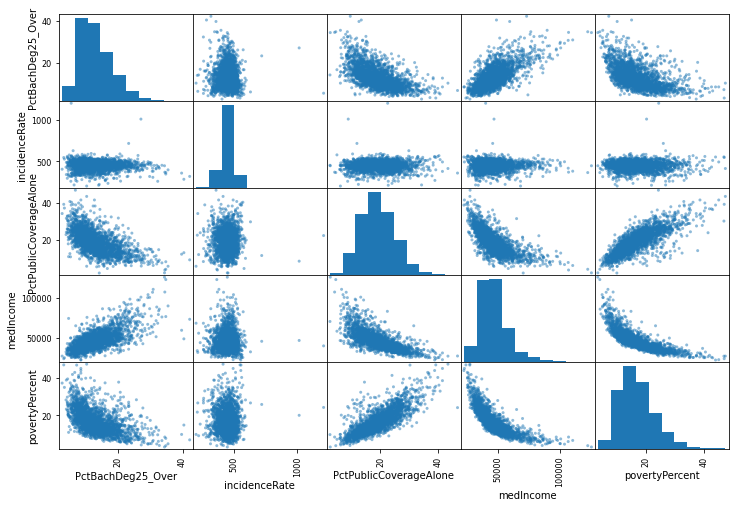

In [7]:
from pandas.plotting import scatter_matrix

attributes=["PctBachDeg25_Over","incidenceRate","PctPublicCoverageAlone","medIncome", "povertyPercent"]
scatter_matrix(train_data[attributes],figsize=(12,8))
plt.show()

In [8]:
print(train_data['PctPublicCoverageAlone'].corr(train_data['povertyPercent']))
print(train_data['medIncome'].corr(train_data['povertyPercent']))
print(train_data['PctPublicCoverageAlone'].corr(train_data['medIncome']))
print(train_data['PctBachDeg25_Over'].corr(train_data['medIncome']))

0.7915951275930192
-0.784651580494321
-0.7090088056387881
0.6912056521326154


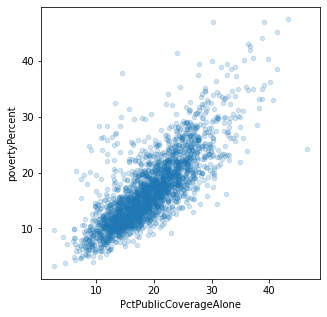

In [9]:
train_data.plot(kind="scatter",x="PctPublicCoverageAlone",y="povertyPercent",alpha=0.2,figsize=(5,5))
plt.show()

There is a high positive correlation between PctPublicCoverageAlone and povertyPercent which is quite possible. Since PctPublicCoverageAlone means the percentage of residents of the county with government-provided health coverage alone, it indicates that there are more residents who are unable to afford private health coverage, when the povertyPercent is high.


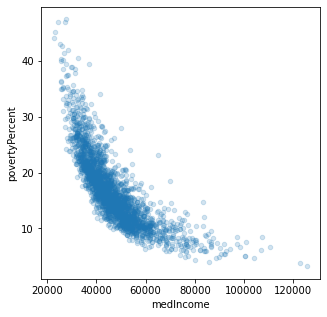

In [10]:
train_data.plot(kind="scatter",x="medIncome",y="povertyPercent",alpha=0.2,figsize=(5,5))
plt.show()

There is a high negative correlation between medIncome which is the median income of the county residents and the povertyPercent, which is the percentage population of residents in poverty. As median income increases, the poverty percentage decreases.


# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [11]:
a = train_data.isna().sum()
for i in range(len(a)):
    if(a[i]>0):
        print(train_data.columns[i]) # columns having missing values

PctSomeCol18_24
PctEmployed16_Over
PctPrivateCoverageAlone


In [12]:
# imputing missing values by the median
median_PctSomeCol18_24=train_data['PctSomeCol18_24'].median()
median_PctEmployed16_Over=train_data['PctEmployed16_Over'].median()
median_PctPrivateCoverageAlone=train_data['PctPrivateCoverageAlone'].median()

values = {'PctSomeCol18_24': median_PctSomeCol18_24, 'PctEmployed16_Over': median_PctEmployed16_Over, 
          'PctPrivateCoverageAlone': median_PctPrivateCoverageAlone}

imp_train_data = train_data.fillna(value=values)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

train_data_prepared = pipeline.fit_transform(imp_train_data)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [14]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression() # for Ordinary Least Squares
lin_reg.fit(train_data_prepared, train_targets)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error

lin_pred = lin_reg.predict(train_data_prepared)
lin_mse=mean_squared_error(train_targets, lin_pred)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

18.910799278666417


In [16]:
from sklearn.model_selection import cross_val_score

#performing cross-validation
scores =cross_val_score(lin_reg, train_data_prepared,train_targets,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)

lin_mean = lin_rmse_scores.mean()
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
    
display_scores(lin_rmse_scores)

Scores: [19.18747072 20.74175689 19.84153974 18.44817179 18.70299545 19.31204314
 19.14546821 20.52052752 17.15326991 19.89205579]
Mean: 19.294529916376927
Standard deviation: 0.9969458502076722


In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 10, 200)
parameters = [{'alpha':alphas}]

lasso_reg=Lasso()

grid_search = GridSearchCV(lasso_reg, parameters, cv=10,scoring='neg_mean_squared_error')
grid_search.fit(train_data_prepared, train_targets)
grid_search.best_params_

{'alpha': 0.05542664520663107}

In [18]:
lasso_reg=grid_search.best_estimator_
lasso_reg.fit(train_data_prepared, train_targets)

lasso_pred = lasso_reg.predict(train_data_prepared)
lasso_mse=mean_squared_error(train_targets, lasso_pred)
lasso_rmse=np.sqrt(lasso_mse)
print(lasso_rmse)

18.93379622191796


We perform cross validation again, as the same training data has been used to get the optimum value of the regularisation parameter ($\alpha$) as well as to determine the RMSE for the lasso regression model.

In [19]:
scores =cross_val_score(lasso_reg, train_data_prepared, train_targets,scoring="neg_mean_squared_error",cv=10)
lasso_rmse_scores = np.sqrt(-scores)
lasso_mean = lasso_rmse_scores.mean()

display_scores(lasso_rmse_scores)

Scores: [19.06276957 20.70716083 19.93680561 18.41015536 18.64291492 19.3574392
 19.11492017 20.38480497 17.12701235 19.90833581]
Mean: 19.265231879764208
Standard deviation: 0.9979830034335924


The Lasso regression adds a penalty term, which is the sum of the absolute coefficients (L1-norm), to the expression obtained by minimising the ordinary least squares.
Here, $\alpha$ is the regularisation weight that is optimised so that the model begins reducing the coefficients of less significant variables. The optimisation is done by using GridSearchCV.

In [20]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-5, 50, 400)
parameters = [{'alpha':alphas}]

ridge_reg=Ridge(random_state=42)

grid_search_r = GridSearchCV(ridge_reg, parameters, cv=10,scoring='neg_mean_squared_error')
grid_search_r.fit(train_data_prepared, train_targets)
grid_search_r.best_params_

{'alpha': 21.920584507173235}

In [21]:
ridge_reg=grid_search_r.best_estimator_

ridge_reg.fit(train_data_prepared, train_targets)

ridge_pred = ridge_reg.predict(train_data_prepared)
ridge_mse=mean_squared_error(train_targets, ridge_pred)
ridge_rmse=np.sqrt(ridge_mse)
print(ridge_rmse)

18.92389768928824


We perform cross validation again, as the same training set has been used to obtain the best value of the regularisation weight ($\alpha$) as well as to determine the RMSE for the ridge regression model.

In [22]:
#Performing cross-validation 
scores =cross_val_score(ridge_reg, train_data_prepared, train_targets,scoring="neg_mean_squared_error",cv=10)
ridge_rmse_scores = np.sqrt(-scores)
ridge_mean = ridge_rmse_scores.mean()

display_scores(ridge_rmse_scores)

Scores: [19.07779856 20.68827678 19.91744693 18.46489654 18.64576798 19.38408044
 19.1425902  20.440053   17.15287984 19.88840496]
Mean: 19.28021952304079
Standard deviation: 0.98829878391127


The Ridge regression adds a penalty component, which is the sum of the squared coefficients (L2-norm), to the expression produced by minimising the ordinary least squares.
Here, $\alpha$ is the regularisation weight that needs to be optimised so that the  model penalises big coefficients and attempts to distribute weights more equally. The optimisation is done by using GridSearchCV.

In [23]:
model_names = ['Ordinary Least Square Regression', 'Lasso Regression', 'Ridge Regression']
model_scores = [lin_mean, lasso_mean, ridge_mean]

scores = pd.DataFrame(model_scores, columns=['Score'])
scores['Model'] = model_names
scores_df = pd.DataFrame(scores, columns=['Model', 'Score'])
scores_df.sort_values(by='Score')

,Model,Score
1,Lasso Regression,19.265232
2,Ridge Regression,19.280220
0,Ordinary Least Square Regression,19.294530


Based on the RMSE (Root Mean Square Error) scores obtained after cross validation, we find that the best performing model is the  Lasso Regression Model, with a lower RMSE value than the Ridge and OLS models.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [24]:
coefficients = pd.DataFrame(grid_search.best_estimator_.coef_, columns=['Weight'])
coefficients['Feature'] = imp_train_data.columns
coefficients_df = pd.DataFrame(coefficients, columns=['Feature', 'Weight'])
coefficients_df.sort_values(key=abs, by='Weight', ascending=False)[0:5]

,Feature,Weight
2,incidenceRate,10.743457
17,PctBachDeg25_Over,-7.152903
29,PctMarriedHouseholds,-6.838499
11,PercentMarried,6.261045
20,PctPrivateCoverage,-6.158456


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [25]:
from sklearn.ensemble import RandomForestRegressor

targets = train_targets['TARGET_deathRate']

param_grid = [{'n_estimators': [50, 100, 150, 200],'max_features':[2, 4, 6, 8, 10, 12, 14, 16]}, 
               {'bootstrap': [False],'max_depth':[None,1,2,3,4,5]}]

forest_reg=RandomForestRegressor(random_state=42)

grid_search_f = GridSearchCV(forest_reg, param_grid, cv=10,scoring='neg_mean_squared_error')
grid_search_f.fit(train_data_prepared, targets)
grid_search_f.best_params_

{'max_features': 14, 'n_estimators': 200}

In [26]:
forest_reg = grid_search_f.best_estimator_
forest_reg.fit(train_data_prepared, targets)

forest_pred=forest_reg.predict(train_data_prepared)
forest_mse = mean_squared_error(targets, forest_pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

6.9100418993119055

The RMSE score for Random Forest is quite low. We perform cross validation to avoid overfitting.

In [27]:
scores =cross_val_score(forest_reg, train_data_prepared, targets,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)
forest_mean = forest_rmse_scores.mean()

display_scores(forest_rmse_scores)

Scores: [17.69144473 19.72681913 18.72162176 17.90158852 17.73768619 19.35281168
 20.64259396 19.82433942 16.1062771  17.93146508]
Mean: 18.563664756612717
Standard deviation: 1.2740354174780055


In [28]:
feature_importances = pd.DataFrame(grid_search_f.best_estimator_.feature_importances_, columns=['Weight'])
feature_importances['Feature'] = imp_train_data.columns
feature_importances_df = pd.DataFrame(feature_importances, columns=['Feature', 'Weight'])
feature_importances_df.sort_values(key=abs, by='Weight', ascending=False)[0:5]

,Feature,Weight
2,incidenceRate,0.171778
17,PctBachDeg25_Over,0.144499
16,PctHS25_Over,0.057271
24,PctPublicCoverageAlone,0.055157
3,medIncome,0.052347


It is observed that the top two relevant features from both Lasso and Random Forest Regression is the same. This most likely means that these two features have the maximum importance.

The lasso model applies regularisation to determine the coefficients of the linear regression model. The lasso regression adds a penalty term to the expression obtained by minimising the linear regression model. This adjustment has the effect of making some of the coefficients zero, effectively dropping some features from the model and performing feature selection.

The random forest algorithm fits numerous trees, each tree in the forest is constructed by randomly selecting various attributes from the dataset. To attain maximum reduction in variance, the nodes of each tree are built up by selecting and splitting. The average of the outputs of the individual trees is used to generate the final result when predicting on the test set. Each variable is permuted over all trees, and the difference between them before and after permutation out of sample error is determined. The factors with the greatest difference are deemed the most essential, while those with lower values are deemed less so.

Since the procedure for feature selection is different for both these algorithms, we end up with different relevant features.
Also, the effect of some features like PctPrivateCoverage and PctPublicCoverageAlone are essentially similar on the target variable.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [29]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
# imputing missing values by the median
median_PctSomeCol18_24=test_data['PctSomeCol18_24'].median()
median_PctEmployed16_Over=test_data['PctEmployed16_Over'].median()
median_PctPrivateCoverageAlone=test_data['PctPrivateCoverageAlone'].median()

values = {'PctSomeCol18_24': median_PctSomeCol18_24, 'PctEmployed16_Over': median_PctEmployed16_Over, 
          'PctPrivateCoverageAlone': median_PctPrivateCoverageAlone}

imp_test_data = test_data.fillna(value=values)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
final_model=grid_search_f.best_estimator_
final_model.fit(train_data_prepared, targets)
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions
test_data_prepared = pipeline.transform(imp_test_data)
final_predictions=final_model.predict(test_data_prepared)

final_mse = mean_squared_error(test_targets,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

21.075412459388147
